In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import classification_report 

In [19]:
def load_data():
    data = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')
    return data, test

def splitdataset(data): 
     
    aux = data.shape[1]
    X   = data.values[:, 2:aux] 
    Y   = data.values[:, 1] 
      
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)
    print('len(y_test)', len(y_test))
    return X, Y, X_train, X_test, y_train, y_test

In [23]:
def generateTrain(X, Y, criterion = 'gini'):        
    decisionTree = DecisionTreeClassifier(criterion = criterion)    
    decisionTree.fit(X, Y) 
    return decisionTree

def getAccuracy(y_test, y_pred):      
    print("Confusion Matrix: ")
    print(confusion_matrix(y_test, y_pred))       
    print("Accuracy : ", accuracy_score(y_test,y_pred)*100) 
          
def makePrediction(decisionTree, X_test):    
    Y_pred = decisionTree.predict(X_test)
    return Y_pred

def determinateDataWithOutCorrelation(data, index, column_class):
    corr_data = data.corr()         
    corr_data = corr_data.where(np.triu(np.ones(corr_data.shape), k = 1).astype(np.bool))        
    to_drop   = [column for column in corr_data.columns if any(corr_data[column].abs() > index)]         
    new_data  = pd.DataFrame(data = data)
     
    for column in new_data:
        if column in to_drop  and column_class != column:
            new_data = new_data.drop(column, 1)
     
    return new_data


def CSF(df, class_name):
     # Empezamos a dibujar
    plt.figure(figsize=(30,25))
    
    # Obtenemos la correlacion entre los atributos
    cor = df.corr()
        
    # Ploteamos correlation
    sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
    plt.savefig('Correlations.png')
    
    # Correlation de todos los atributos contra el atributo 'SalePrice'
    cor_target = abs(cor[class_name])
    
    # Selccionamos los atributos con al menos 0,5 de correlacion
    relevant_features = cor_target[cor_target>0.5]
    
    print('########## FEATURES WITH LONG CORRELATION ##########')
    print(relevant_features)
    
    for column in df:
        #print('column: ', column)
        if column not in relevant_features:
            #print('elimine')
            df = df.drop(column, 1)
    
    print(df.shape)
                            
    new_df = determinateDataWithOutCorrelation(df, 0.7, class_name)
    
    return new_df

In [22]:
def main():
    data, test = load_data()    
    #new_data = CSF(data, 'target')
    
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data)
    decisionTree = generateTrain(X, Y)
    
    y_pred = makePrediction(decisionTree, X_test)    
    getAccuracy(y_test, y_pred)

########## FEATURES WITH LONG CORRELATION ##########
target    1.0
Name: target, dtype: float64
(595212, 1)


IndexError: index 1 is out of bounds for axis 1 with size 1

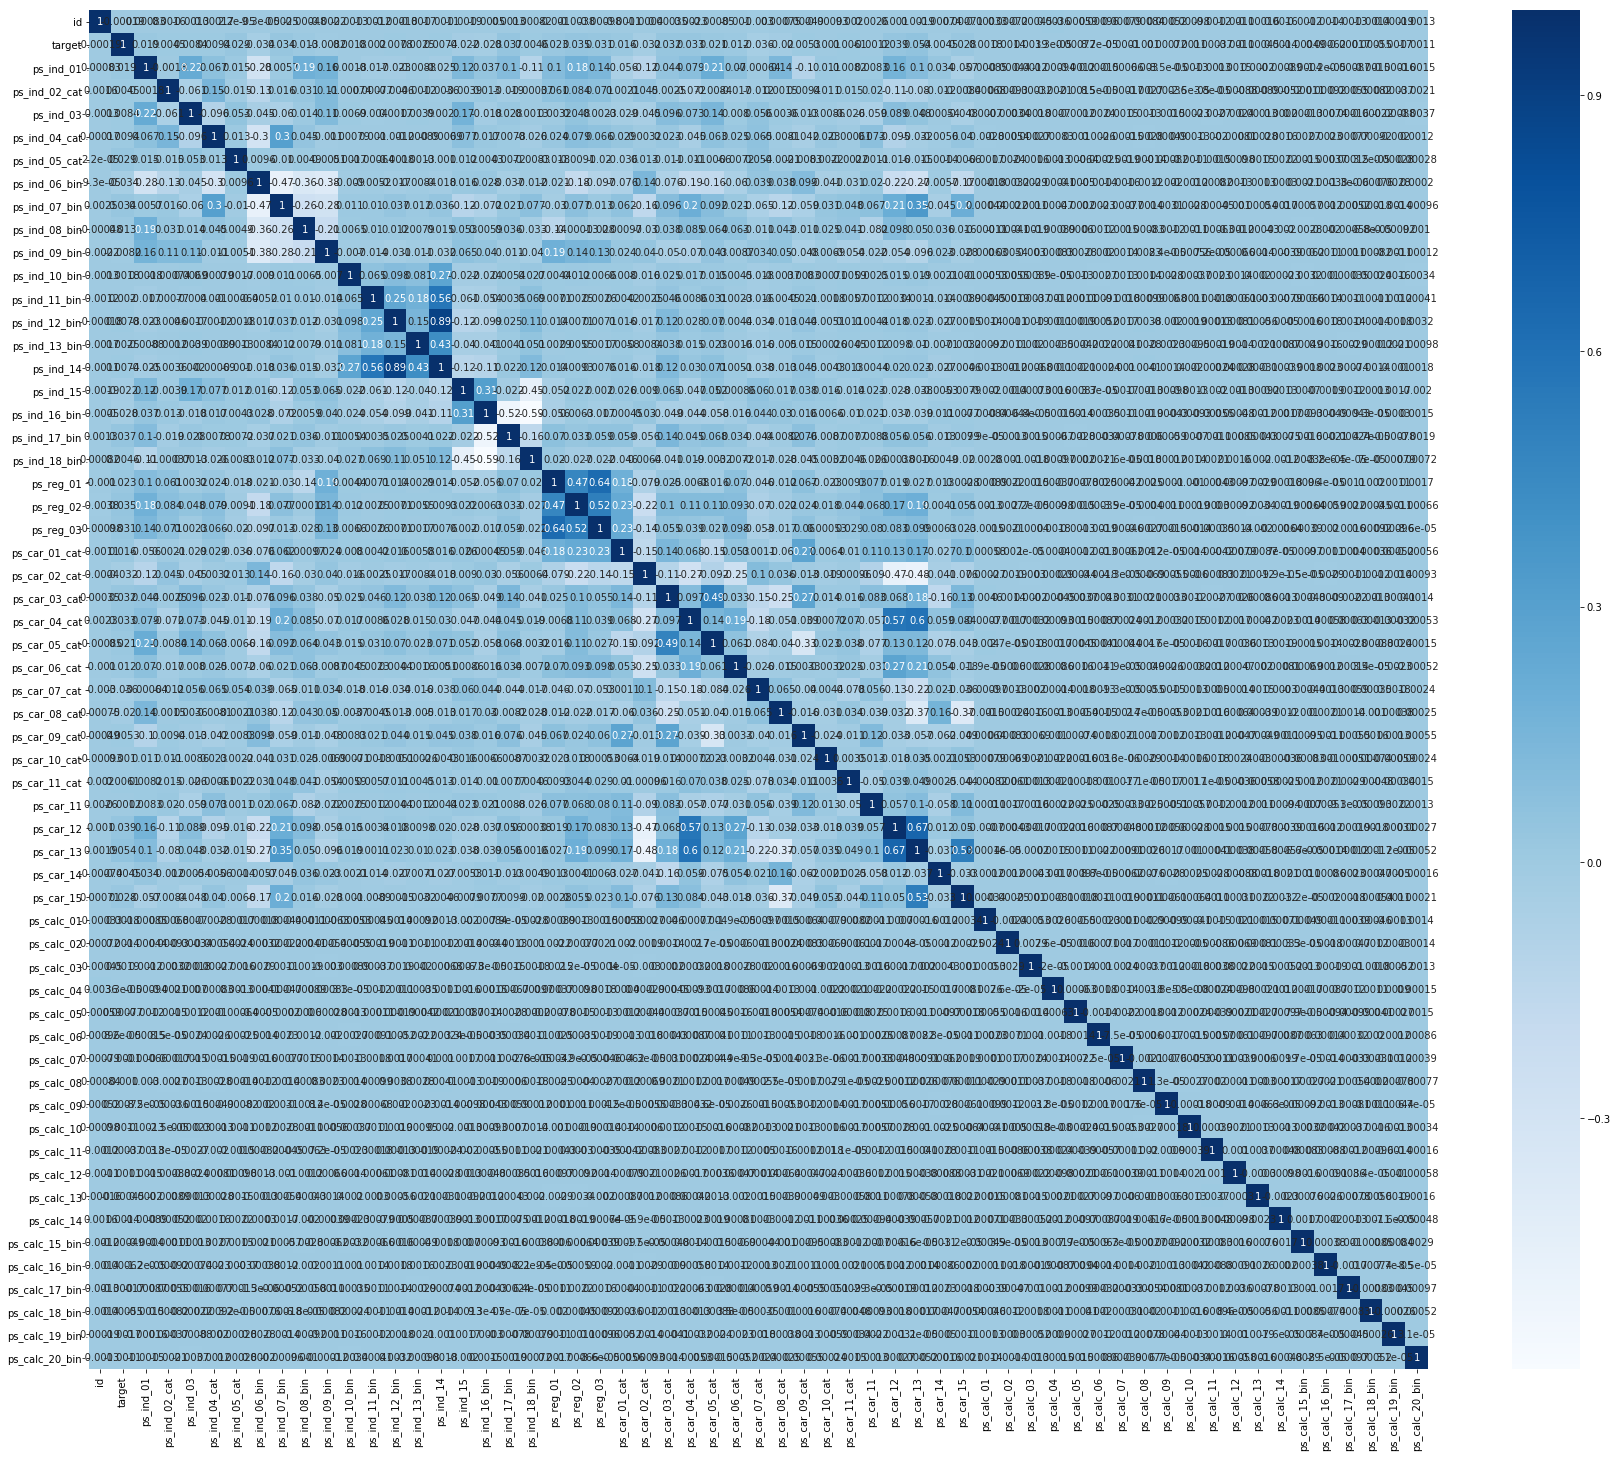

In [24]:
if __name__ == '__main__':
    main()